## **Required Installation**

In [1]:
!pip install -q fastai fastbook nbdev transformers

## **Necessary packages**

In [2]:
import os
import numpy as np
import pandas as pd
from fastai import *
from PIL import Image
from fastbook import *
from fastai.vision.all import *
import matplotlib.pyplot as plt
from distutils.dir_util import copy_tree

## **Initial directory**

In [3]:
%cd /kaggle/input/artwork-title-generator

/kaggle/input/artwork-title-generator


## **Fetching sub-folders**

In [4]:
img_folders = os.listdir()
img_folders.remove('csvFiles')
img_folders.remove('artwork_title_generator_data.csv')
img_folders

['Italy',
 'Japan',
 'UnitedStates',
 'France',
 'Netherlands',
 'China',
 'Germany',
 'England']

## **Copying files to the working directory**

In [5]:
input_path = "/kaggle/input/artwork-title-generator"
output_path = "/kaggle/working/images/"

for folder in img_folders:
    copy_tree(input_path+'/'+folder, output_path+folder)

In [6]:
input_path = "/kaggle/input/artwork-title-generator/csvFiles"
output_path = "/kaggle/working/csvFiles/"

copy_tree(input_path, output_path)

['/kaggle/working/csvFiles/csvFiles/Italy.csv',
 '/kaggle/working/csvFiles/csvFiles/France.csv',
 '/kaggle/working/csvFiles/csvFiles/England.csv',
 '/kaggle/working/csvFiles/csvFiles/Japan.csv',
 '/kaggle/working/csvFiles/csvFiles/Netherlands.csv',
 '/kaggle/working/csvFiles/csvFiles/China.csv',
 '/kaggle/working/csvFiles/csvFiles/Germany.csv',
 '/kaggle/working/csvFiles/csvFiles/UnitedStates.csv']

## **Working directories initialization**

In [7]:
%cd /kaggle/working/

images_path = "images/"
csv_path = "csvFiles/csvFiles"

/kaggle/working


## **Fetching sub-folders in the working directory**

In [8]:
img_folders = os.listdir(images_path)
img_folders

['France',
 'Netherlands',
 'China',
 'Japan',
 'Italy',
 'UnitedStates',
 'Germany',
 'England']

## **Function to view images distribution**

In [9]:
def plot_images_distribution(dic):
  labels = dic.keys()
  number_of_images = list(dic.values())
  range_y = [ i for i in range(0, 14000, 2000)]
  plt.ylim(range_y[0], range_y[len(range_y)-1])
  plt.bar(labels, number_of_images)
  plt.xlabel('Labels')
  plt.xticks(rotation=90)
  plt.ylabel('Number of images')
  plt.title('Images distribiution')
    
  for i in range(len(number_of_images)):
    val = number_of_images[i]
    plt.text(i, val+0.5, str(val), ha='center', va='bottom')

  plt.show()

## **Number of images within folders**

In [10]:
def img_numbers() -> dict: return { folder_name: len(get_image_files_sorted(images_path+'/'+folder_name)) for folder_name in img_folders}

## **Viewing initial images distribution**

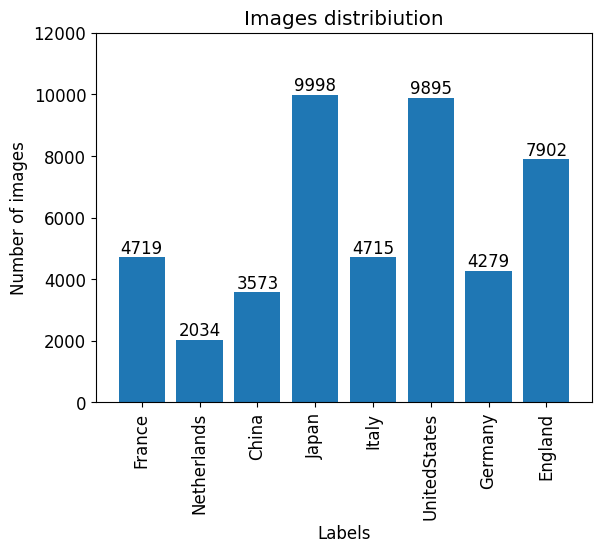

In [11]:
img_dict = img_numbers()
# print(img_dict)
plot_images_distribution(img_dict)

## **Function to verify images**

In [12]:
def image_verification(path, folders):
  for folder in folders:
    failed = verify_images(get_image_files_sorted(path+'/'+folder))
    for img in failed:
      os.remove(img)

## **Verifying images**

In [13]:
image_verification(path = images_path, folders = img_folders)

## **Images distribution after cleaning**

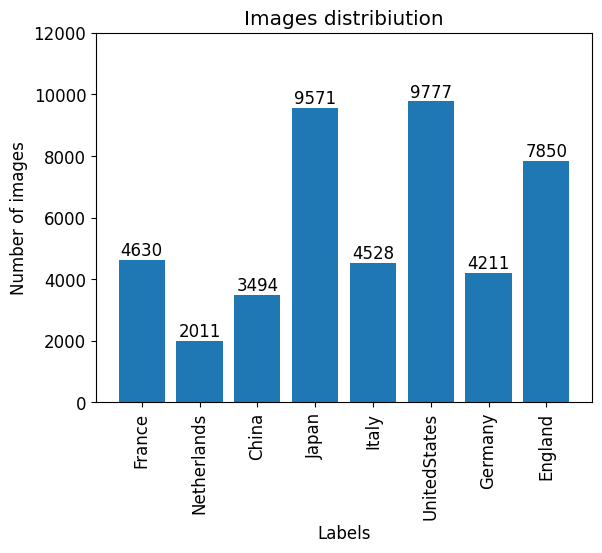

In [14]:
img_dict = img_numbers()
# print(img_dict)
plot_images_distribution(img_dict)

## **Identifying grayscale images**

In [15]:
gray_scale_images = [image_path for folder in img_folders for image_path in get_image_files_sorted(images_path+'/'+folder) if np.array(Image.open(image_path)).ndim not in [3,4]]
len(gray_scale_images)

56

## **Removing grayscale images**

In [16]:
for path in gray_scale_images: 
    os.remove(path)

## **Images distribution after removal**

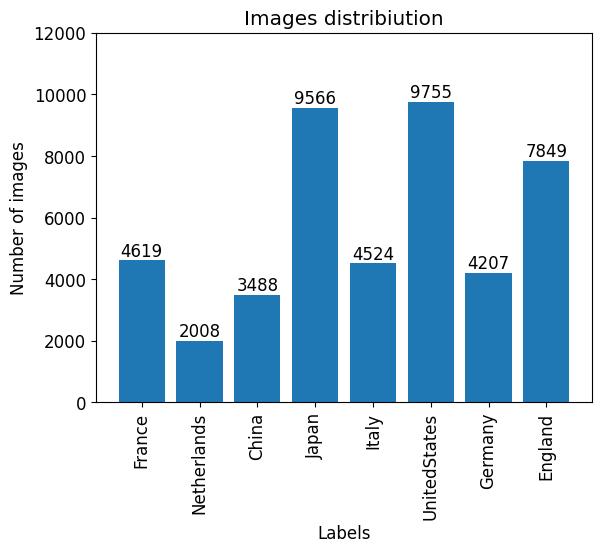

In [17]:
img_dict = img_numbers()
# print(img_dict)
plot_images_distribution(img_dict)

## **Fetching csv files**

In [18]:
files = os.listdir(csv_path)
files

['China.csv',
 'UnitedStates.csv',
 'Germany.csv',
 'Japan.csv',
 'Netherlands.csv',
 'France.csv',
 'Italy.csv',
 'England.csv']

## **Merging and creation of a dataframe**

In [19]:
df = pd.DataFrame()
for file in files:
  data_frame = pd.read_csv(f"{csv_path}/{file}")
  df = pd.concat([df, data_frame], ignore_index = True)

## **Viewing dataframe**

In [20]:
df.head()

,ids,artists,mediums,titles,descriptions,urls
0,ch_1,NaN,Qingbai ware; porcelain with underglaze molded and carved decoration,Incense Burner in the Form of a Duck,"In its subtle elegance, this incense burner reflects the refined sensibility of Song dynasty China’s cultural elite—members of the imperial court as well as newly affluent and well-educated classes of merchants and government officials. The basin of this incense burner, elevated on a lobed foot, contains an artichokelike lotus that opens into two tiers of small, pointed petals and supports a delicately carved waterfowl. Fragrant smoke would have wafted gently from the bird’s mouth and from two holes perforated between its feet. As Song poets and painters praised incense for its efficacy in...",https://www.artic.edu/artworks/43060/incense-burner-in-the-form-of-a-duck
1,ch_2,NaN,Bronze,Cauldron,"As this monumental cauldron demonstrates, the most distinctive bronze vessels of early China represent important historical documents as well as stunningly powerful works of art. Designed to contain offerings of meat in ritual ceremonies, this vessel was cast with a lengthy inscription on its interior bowl. The text commemorates a solemn ritual ceremony at the imperial court of the Zhou, the second dynasty recorded in Chinese texts, and explains that Captain Wang, a noble official who had been rewarded for his loyal service to the Zhou king, commissioned this vessel to honor his deceased f...",https://www.artic.edu/artworks/185963/cauldron
2,ch_3,NaN,Earthenware with polychrome pigments,Equestrienne,"Chinese ceramic figures made exclusively for burial often vividly evoke the fashions and recreational activities of their aristocratic owners. This figure sensitively captures a quiet moment in the life of a matronly equestrienne, who gently guides her horse. The animal’s powerful neck and flanks, long legs, trimmed mane, and decoratively tied tail are features distinctive to the handsome breeds that were brought to China from the empire’s northwestern frontiers as well as from sites as far west as the Aral Sea. Carefully twisted strands of clay realistically depict the fur-like texture of...",https://www.artic.edu/artworks/35376/equestrienne
3,ch_4,NaN,Handscroll; ink and light color on paper,Yang Pu Moving His Family,"With a lively combination of realism and caricature, this detail of the painting Yang Pu Moving His Family depicts a group of peasants transporting a rustic scholar and his family across a stream. Distinguished by his official government cap, with its long streamers, the otherwise disheveled, bare-legged scholar bids farewell to his neighbors on the shore. Servants valiantly attempt to carry children and the family’s belongings—scrolls, furniture, and dishes—through the water. The scholar depicted here may represent Yang Pu, a character described in stories of the Southern Song dynasty (11...",https://www.artic.edu/artworks/76279/yang-pu-moving-his-family
4,ch_5,NaN,Stoneware with olive-green glaze and molded and applied decoration,Funerary Urn (Hunping),"This complex and imaginatively modeled vessel is known as an “urn of the soul,” a symbolic dwelling for the spirit of the deceased. A profusion of figures was molded and applied to its sealed lid, which takes the form of a multistory pavilion. In the balcony-like mouth-rim, a tortoise supports a large vertical tablet, a common form of memorial stone. The real and mythical creatures on the vessel—birds, monkeys, bears, dragons, kneeling figures, and immortals riding dragons—all follow the iconography of early Chinese funerary art. Intermingled with these images, however, are depictions of t...",https://www.artic.edu/artworks/70003/funerary-urn-hunping


## **Function to view shape**

In [21]:
def df_shape(df):
  print(f'Number of rows: {df.shape[0]}')
  print(f'Number of columns: {df.shape[1]}')

## **Viewing dataframe shape**

In [22]:
df_shape(df)

Number of rows: 47115
Number of columns: 6


## **Checking NaN values**

In [23]:
df.isna().sum()

ids                 0
artists          7129
mediums           307
titles              5
descriptions    41962
urls                0
dtype: int64

## **Fetching working image ids** 

In [24]:
img_ids = []

for folder in img_folders:
  temp = [str(path).split("/")[3].split(".")[0] for path in get_image_files_sorted(f"{images_path}{folder}/")]
  img_ids.extend(temp)
len(img_ids)

46016

## **Fetching corrupted image ids**

In [25]:
corrupted_image_indices_to_drop = [index for index in range(len(df)) if df.iloc[index]['ids'] not in img_ids]
len(corrupted_image_indices_to_drop)

1099

## **Removing corrupted image rows** 

In [26]:
df = df.drop(corrupted_image_indices_to_drop).reset_index(drop=True)

## **Images root path**

In [27]:
images_root_path = "/kaggle/working/images/"

## **Mapping abbreviations with root folder**

In [28]:
path_dict = {
    'ch' : 'China',
    'eng' : 'England',
    'Fra' : 'France',
    'ger' : 'Germany',
    'itl' : 'Italy',
    'jp' : 'Japan',
    'nl' : 'Netherlands',
    'usa' : 'UnitedStates'    
}

## **Listing image paths**

In [29]:
image_paths = [ f"{images_root_path}{path_dict[df.iloc[i]['ids'].split('_')[0]]}/{path_dict[df.iloc[i]['ids'].split('_')[0]]}/{df.iloc[i]['ids']}.jpg" for i in range(len(df))]
image_paths[:5]

['/kaggle/working/images/China/China/ch_1.jpg',
 '/kaggle/working/images/China/China/ch_2.jpg',
 '/kaggle/working/images/China/China/ch_3.jpg',
 '/kaggle/working/images/China/China/ch_4.jpg',
 '/kaggle/working/images/China/China/ch_5.jpg']

## **New column with image paths**

In [30]:
df['images_path'] = image_paths

## **Creating a title count dictionary if multiple same title exists** 

In [31]:
titles_dict = df['titles'].value_counts().to_dict()

## **Mapping title with multiple counts**

In [32]:
multiple_same_titles = {key: 0 for key, value in titles_dict.items() if value > 1}

In [33]:
len(multiple_same_titles)

4523

## **Keeping one value removing rows having titles with same values** 

In [34]:
indices_to_drop = []

for i in range(len(df)):
  if df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 0:
    multiple_same_titles[df.iloc[i]['titles']] = 1
  elif df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 1:
    indices_to_drop.append(i)

len(indices_to_drop)

11454

## **Removing indices**

In [35]:
df = df.drop(indices_to_drop).reset_index(drop=True)

## **Deleting redundant columns for workings**

In [36]:
df = df.drop(columns=['ids', 'artists', 'mediums', 'descriptions', 'urls'], axis=1)

## **Cheking if NaN value exists in the final data**

In [37]:
df.isna().sum()

titles         5
images_path    0
dtype: int64

## **Dropping NaN value rows**

In [38]:
df = df.dropna().reset_index(drop=True)

## **Checking final dataframe shape**

In [39]:
df_shape(df)

Number of rows: 34557
Number of columns: 2


## **Viewing final dataframe**

In [40]:
df.head()

,titles,images_path
0,Incense Burner in the Form of a Duck,/kaggle/working/images/China/China/ch_1.jpg
1,Cauldron,/kaggle/working/images/China/China/ch_2.jpg
2,Equestrienne,/kaggle/working/images/China/China/ch_3.jpg
3,Yang Pu Moving His Family,/kaggle/working/images/China/China/ch_4.jpg
4,Funerary Urn (Hunping),/kaggle/working/images/China/China/ch_5.jpg


## **Exporting to final .csv file**

In [41]:
df.to_csv('artwork_title_generator_data.csv', index = False)